## Get some images

Get some example images to practice with. 

In [1]:
import pandas as pd

# This notebook assumes you have your folders set up following the Exam Template, and this is in an 'exercise' folder or similar
# Otherwise, adjust your path(s) as needed
# You do not need to strictly follow this approach, do what works for you

data_path = "../data/"
df = pd.read_csv(data_path + "metadata.csv")

img_path = data_path + "imgs/"
mask_path = data_path + "masks/"

## Load 2-3 example images and masks with numpy and inspect / print properties of the array (as a variable)

Refer to https://numpy.org/doc/2.3/reference/generated/numpy.ndarray.html

### Questions (high priority)

* What can you say about the shape and type (what type of number is each value), are they the same or different for different images? 
    * What does a shape of an image tell us? Explain shape output (820, 615, 3) and (820, 615, 4).

* How can we find darkest and brightest pixel values?

* Look at the statistics like minimum and maximum values in the array, do they differ between images, or between images and masks?

#### Questions (low priority)

* To help interpretability (values between 0 and 255) and reduce storage, you could consider using integers to represent the images instead of floating point numbers. You can use ndarray.astype() for this.

* What would be the color for pixel values = 0 ; 128 ; 255?

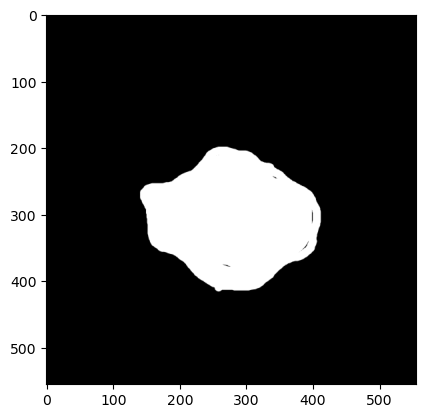

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Get a random image id, you can also specify one yourself
image_id = list(df["img_id"].sample(random_state=42))[0]

# Load the image/mask
file_im = img_path + image_id
file_mask = (mask_path + image_id).replace(".png", "_mask.png")
im = plt.imread(file_im)
mask = plt.imread(file_mask)

# View image/mask
im = plt.imread(file_im)
mask = plt.imread(file_mask)
plt.imshow(mask, cmap='gray') #gray colormap helps interpretability

# You can now use "im" and "mask" to answer the questions above
# It might be worth to refactor the above code into a function, so you can quickly load different images and masks given an image ID


# Your code here

    # Check the shape

    # Brightest and darkest pixel values

    # Differences in Min and Max values

    # Colour

    # Converting to Int type


## Selecting parts of the image

Suppose you want to crop the center area of the image (does not need to be exact).

Write code to
* Select only those pixels and display them
  * Hint: Use array slicing: im_crop = im[row_start:row_end, col_start:col_end, :]
* Write a function that lets you: (**optional**, but could be useful for your project)
  * Choose crop size (e.g. size = 100, meaning image is 100x100) 
  * Crops the image based on the center (also consider if the center of the image is equivalent to the center of the skin lesion)
  * Crops the image based on the mask boundaries 

Hint for center calculations:
- Get shape information: height = im.shape[0]  and
width = im.shape[1]
- Top edge: $rowstart = \frac{height}{2} - \frac{size}{2}$
- Bottom edge: $rowend = \frac{height}{2} + \frac{size}{2}$
- Repeat for columns using width

In [ ]:
# Selecting a part of the image

# Define start location of your crop (origin)
# This essentially corresponds to the 'top left corner' of your cropped image
loc_x = 0
loc_y = 0

# Show 50x50 part of the image
crop_size = 50
im_crop = # Your code here

plt.imshow(im_crop)

## Color channels

* Select the red, green, blue channels of an image separately and display them. How do the intensities correspond to colors that you visually perceive in the image? You might want to find example images that are more "colorful" for this exercise.

In [ ]:
im_red = # Your code here
plt.imshow(im_red, cmap='gray')

## Intensity histogram

Now we look at the intensity histogram, which can be for the entire image if we convert it to grayscale, or just for a single channel. For grayscale conversion we use scikit-image (cousin of scikit-learn): https://scikit-image.org/

* Why do we need to add 0:3 in the rgb2gray conversion below?
* What does the flatten() function do and why do we need it?
* Is the default histogram generated with this code informative enough? How can you change it?

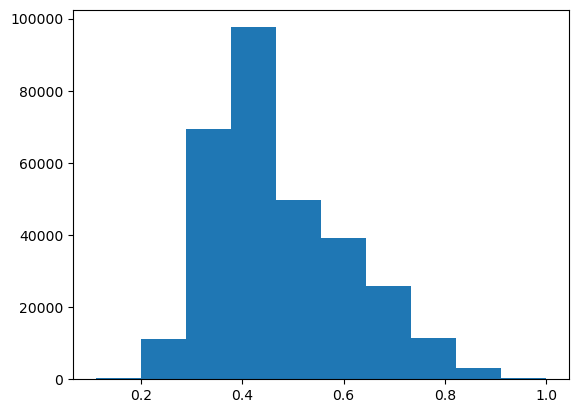

In [ ]:
from skimage.color import rgb2gray

im_gray = rgb2gray(im[:,:,0:3])
hist = plt.hist(im_gray.flatten())

## Optional - Histogram equalisation

If you are ahead of time and want to practice with OpenCV and histogram equalisation (might be useful later in the project), you can go explore the code below. You might need to try with different images that appear to have low contrast.

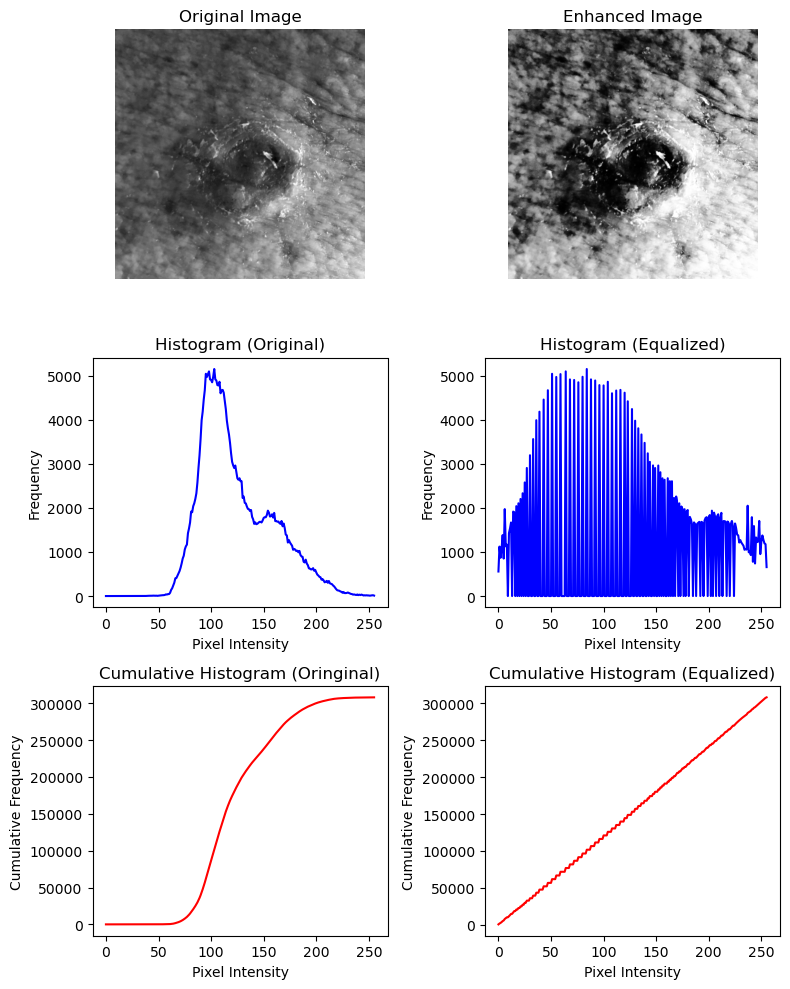

In [4]:
import cv2

img_bgr = cv2.imread(file_im)

# swap color channel from BGR to RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# convert to grayscale
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)


# apply histogram equalization to enhance contrast
equalized_img = cv2.equalizeHist(img_gray)

# calculate histogram
hist_org, _ = np.histogram(img_gray.flatten(), bins=256, range=[0, 256])
hist_equalized, _ = np.histogram(equalized_img.flatten(), bins=256, range=[0, 256])

# calculate cumulative histogram
cumul_hist_org = np.cumsum(hist_org)
cumul_hist_equalized = np.cumsum(hist_equalized)

# create subplots to display the images
plt.figure(figsize=(8, 10))

# display the original grayscale image
plt.subplot(3, 2, 1)
plt.imshow(img_gray, cmap="gray")
plt.title("Original Image")
plt.axis('off')

# display the equalized image
plt.subplot(3, 2, 2)
plt.imshow(equalized_img, cmap="gray")
plt.title("Enhanced Image")
plt.axis('off')

plt.subplot(3, 2, 3)
plt.plot(hist_org, color='blue')
plt.title("Histogram (Original)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(3, 2, 4)
plt.plot(hist_equalized, color='blue')
plt.title("Histogram (Equalized)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")


plt.subplot(3, 2, 5)
plt.plot(cumul_hist_org, color='red')
plt.title("Cumulative Histogram (Oringinal)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Cumulative Frequency")

plt.subplot(3, 2, 6)
plt.plot(cumul_hist_equalized, color='red')
plt.title("Cumulative Histogram (Equalized)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Cumulative Frequency")

# show the plots
plt.tight_layout()
plt.show()

